In [25]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Team data files
hockey_team_path = "Teams.csv"

# Read the yearly team data and results
hockey_team_data = pd.read_csv(hockey_team_path)


# Display the data table for preview
hockey_team_data.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
0,1909,NHA,COB,BKN,NaN,NaN,4,NaN,12,4,...,104,Cobalt Silver Kings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1909,NHA,HAI,MTL,NaN,NaN,5,NaN,12,4,...,83,Haileybury Hockey Club,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1909,NHA,LES,TBS,NaN,NaN,7,NaN,12,2,...,100,Les Canadiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1909,NHA,MOS,MOS,NaN,NaN,6,NaN,12,3,...,95,Montreal Shamrocks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1909,NHA,MOW,MTW,NaN,NaN,1,NaN,12,11,...,41,Montreal Wanderers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# The original dataframe included teams from leagues outside of the National Hockey League (NHL), so we are filtering for just NHL data
nhl_team_data_uncleaned = pd.DataFrame(hockey_team_data.loc[(hockey_team_data["lgID"]=="NHL"),:])

# A lockout in 1994 forced only a portion of the season to be played, so we will delete that year's data to eliminate future outliers
nhl_team_data = pd.DataFrame(nhl_team_data_uncleaned.loc[(nhl_team_data_uncleaned["year"]!=1994),:])
nhl_team_data.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
65,1917,NHL,MTL,MTL,NaN,NaN,1,NHLF,22,13,...,84,Montreal Canadiens,336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,1917,NHL,MTW,MTW,NaN,NaN,4,NaN,6,1,...,35,Montreal Wanderers,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,1917,NHL,OTS,STE,NaN,NaN,3,NaN,22,9,...,114,Ottawa Senators,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,1917,NHL,TOA,TOR,NaN,NaN,1,SC,22,13,...,109,Toronto Arenas,355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,1918,NHL,MTL,MTL,NaN,NaN,2,ND,18,10,...,78,Montreal Canadiens,253.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


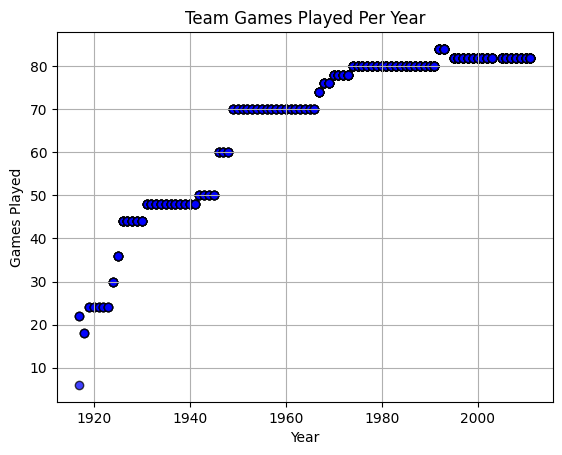

In [5]:
# Building scatter plot for games played per year
plt.scatter(nhl_team_data["year"],nhl_team_data["G"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("Team Games Played Per Year")
plt.xlabel("Year")
plt.ylabel("Games Played")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

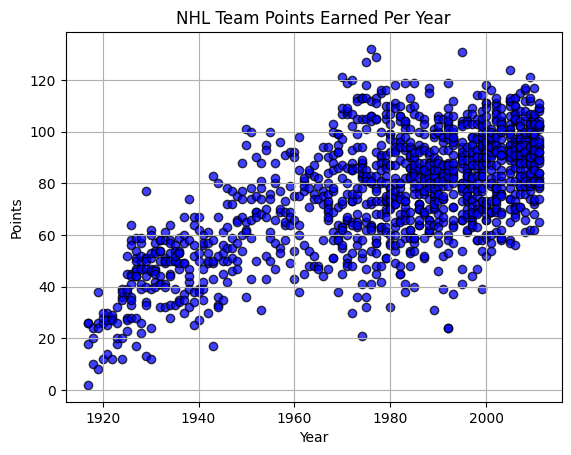

In [6]:
# Building scatter plot for years vs. points earned
plt.scatter(nhl_team_data["year"],nhl_team_data["Pts"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("NHL Team Points Earned Per Year")
plt.xlabel("Year")
plt.ylabel("Points")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

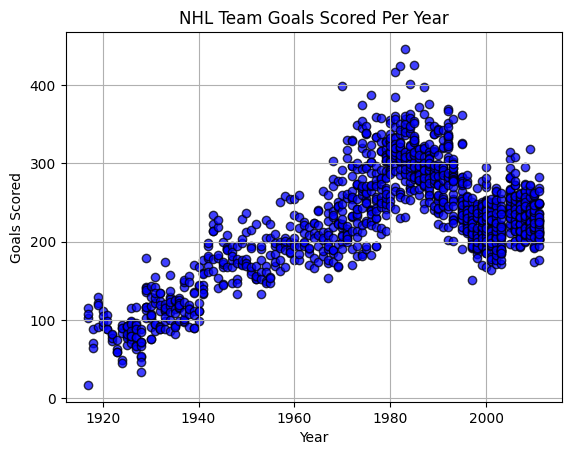

In [7]:
# Building scatter plot for years vs. team goals scored
plt.scatter(nhl_team_data["year"],nhl_team_data["GF"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("NHL Team Goals Scored Per Year")
plt.xlabel("Year")
plt.ylabel("Goals Scored")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

The r-value is: 0.6079680290305622


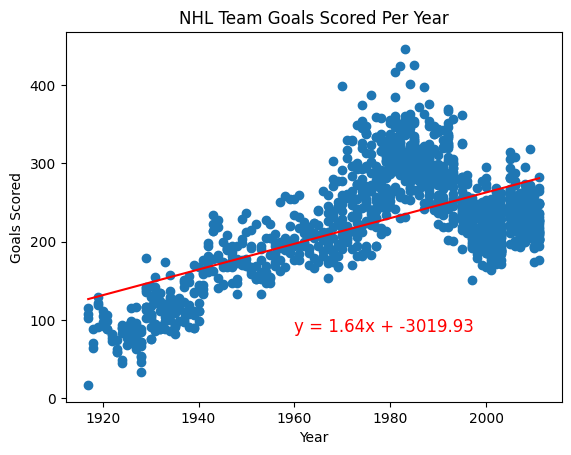

In [28]:
# Linear regresssion on Goals Scored Per Year
x_values = nhl_team_data["year"]
y_values = nhl_team_data["GF"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (1960,85),fontsize=12,color="red")
plt.title("NHL Team Goals Scored Per Year")
plt.xlabel("Year")
plt.ylabel("Goals Scored")
plt.show()

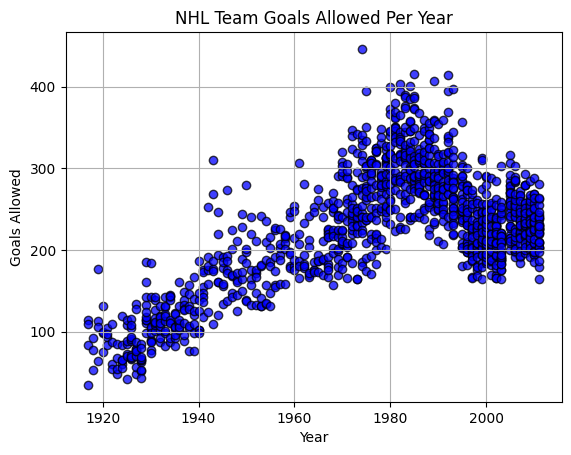

In [9]:
# Building scatter plot for years vs. team goals allowed
plt.scatter(nhl_team_data["year"],nhl_team_data["GA"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("NHL Team Goals Allowed Per Year")
plt.xlabel("Year")
plt.ylabel("Goals Allowed")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Linear Regression for Goals

The r-value is: 0.5908477177221796


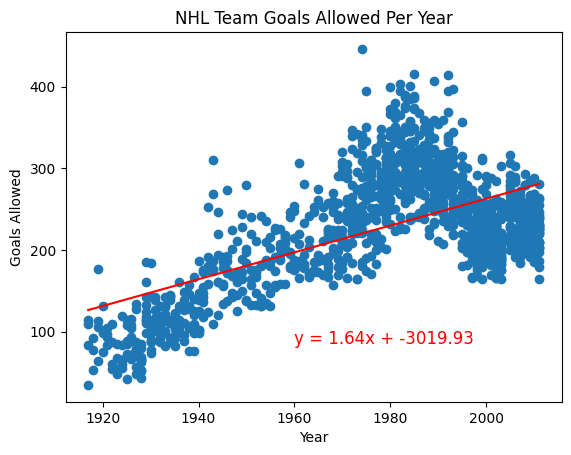

In [29]:
# Linear regresssion on Goals Scored Per Year
x_values = nhl_team_data["year"]
y_values = nhl_team_data["GA"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (1960,85),fontsize=12,color="red")
plt.title("NHL Team Goals Allowed Per Year")
plt.xlabel("Year")
plt.ylabel("Goals Allowed")
plt.show()

Assessing the statistical data

In [21]:
#Dataframe for years
years_list_pull = nhl_team_data.filter(["year"], axis=1)
years_list_values = years_list_pull.drop_duplicates("year", keep='first')
years_list_values = years_list_values.sort_values("year", ascending=True)
years_list = years_list_values.set_index("year")
years_list.head()

""
year
1917
1918
1919
1920
1921


In [22]:
yearly_points_dst = nhl_team_data.groupby("year")
points_earned = yearly_points_dst["Pts"]

mean_points_earned = points_earned.mean()
median_points_earned = points_earned.median()
var_points_earned = points_earned.var()
stdev_points_earned = points_earned.std()
sem_points_earned = points_earned.sem()

# Assemble the resulting series into a single summary DataFrame.

points_earned_summary = years_list.copy()
points_earned_summary["Mean Points Earned"] = mean_points_earned
points_earned_summary["Median Points Earned"] = median_points_earned
points_earned_summary["Points Earned Variance"] = var_points_earned
points_earned_summary["Points Earned Std. Dev"] = stdev_points_earned
points_earned_summary["Points Earned Std. Err"] = sem_points_earned

points_earned_summary

,Mean Points Earned,Median Points Earned,Points Earned Variance,Points Earned Std. Dev,Points Earned Std. Err
year,,,,,
1917,18.000000,22.0,128.000000,11.313708,5.656854
1918,18.000000,20.0,52.000000,7.211103,4.163332
1919,24.000000,25.0,152.000000,12.328828,6.164414
1920,24.000000,27.0,66.666667,8.164966,4.082483
1921,24.000000,26.0,48.666667,6.976150,3.488075
...,...,...,...,...,...
2007,91.066667,93.0,108.822989,10.431826,1.904582
2008,91.400000,92.0,191.006897,13.820524,2.523271
2009,92.033333,90.0,167.688506,12.949460,2.364237


In [23]:
points_earned_summary["year"] = points_earned_summary.index

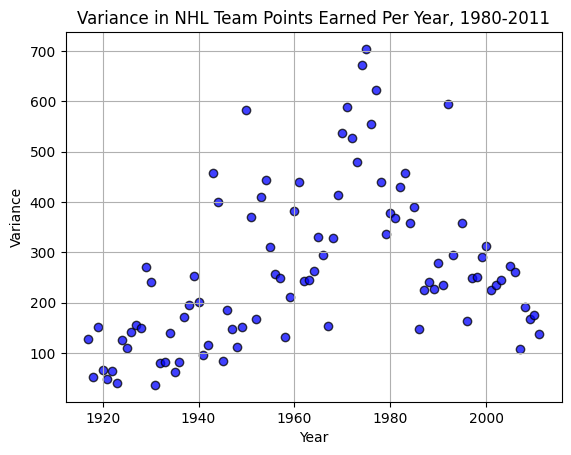

In [24]:
# Building scatter plot for years vs. variance in points scored in modern data
plt.scatter(points_earned_summary["year"],points_earned_summary["Points Earned Variance"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("Variance in NHL Team Points Earned Per Year, 1980-2011")
plt.xlabel("Year")
plt.ylabel("Variance")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Creating a dataset for 1980-2011

In [12]:
# Creating subset of data for 1980-2011
nhl_modern_data = pd.DataFrame(nhl_team_data.loc[(nhl_team_data["year"]>=1980),:])
nhl_modern_data.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
727,1980,NHL,BOS,BOS,WA,AD,2,PRE,80,37,...,272,Boston Bruins,1836.0,26.0,87.0,342.0,8.0,82.0,358.0,13.0
728,1980,NHL,BUF,BUF,WA,AD,1,QF,80,39,...,250,Buffalo Sabres,1194.0,22.0,73.0,310.0,10.0,44.0,268.0,9.0
729,1980,NHL,CAL,CAL,CC,PT,3,SF,80,39,...,298,Calgary Flames,1450.0,24.0,81.0,301.0,12.0,70.0,364.0,8.0
730,1980,NHL,CHI,CHI,CC,SM,2,PRE,80,31,...,315,Chicago Black Hawks,1660.0,30.0,67.0,302.0,9.0,91.0,364.0,8.0
731,1980,NHL,COR,NJD,CC,SM,5,NaN,80,22,...,344,Colorado Rockies,1418.0,36.0,76.0,373.0,8.0,70.0,286.0,5.0


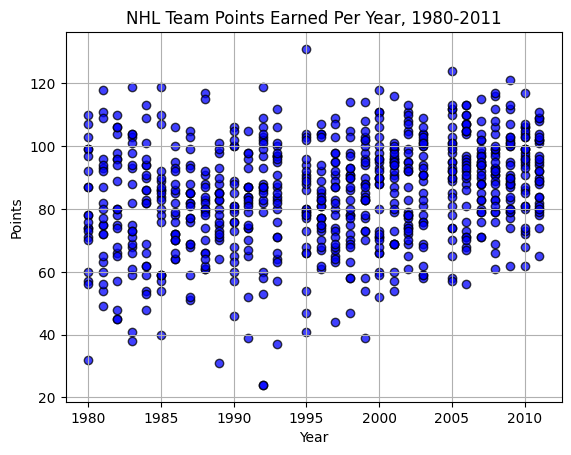

In [13]:
# Building scatter plot for years vs. points scored in modern data
plt.scatter(nhl_modern_data["year"],nhl_modern_data["Pts"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("NHL Team Points Earned Per Year, 1980-2011")
plt.xlabel("Year")
plt.ylabel("Points")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

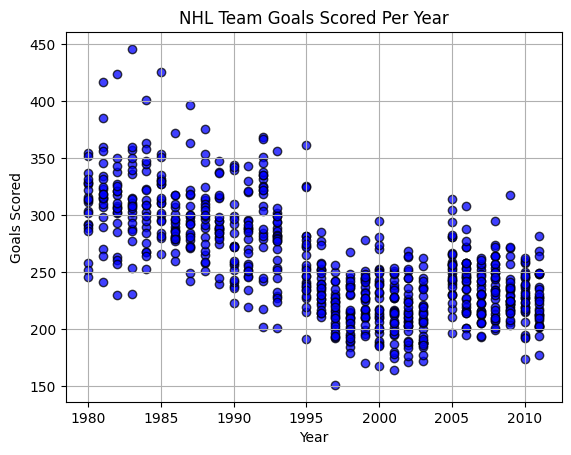

In [14]:
# Building scatter plot for years vs. team goals scored
plt.scatter(nhl_modern_data["year"],nhl_modern_data["GF"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("NHL Team Goals Scored Per Year")
plt.xlabel("Year")
plt.ylabel("Goals Scored")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [15]:
#Dataframe for years
years_list_pull = nhl_modern_data.filter(["year"], axis=1)
years_list_values = years_list_pull.drop_duplicates("year", keep='first')
years_list_values = years_list_values.sort_values("year", ascending=True)
years_list = years_list_values.set_index("year")
years_list.head()

""
year
1980
1981
1982
1983
1984


In [16]:
yearly_points_dst = nhl_modern_data.groupby("year")
points_earned = yearly_points_dst["Pts"]

mean_points_earned = points_earned.mean()
median_points_earned = points_earned.median()
var_points_earned = points_earned.var()
stdev_points_earned = points_earned.std()
sem_points_earned = points_earned.sem()

# Assemble the resulting series into a single summary DataFrame.

points_earned_summary = years_list.copy()
points_earned_summary["Mean Points Earned"] = mean_points_earned
points_earned_summary["Median Points Earned"] = median_points_earned
points_earned_summary["Points Earned Variance"] = var_points_earned
points_earned_summary["Points Earned Std. Dev"] = stdev_points_earned
points_earned_summary["Points Earned Std. Err"] = sem_points_earned

points_earned_summary

,Mean Points Earned,Median Points Earned,Points Earned Variance,Points Earned Std. Dev,Points Earned Std. Err
year,,,,,
1980,80.000000,78.0,377.300000,19.424212,4.238710
1981,80.000000,77.0,368.900000,19.206770,4.191261
1982,80.000000,80.0,428.700000,20.705072,4.518217
1983,80.000000,75.0,457.600000,21.391587,4.668027
1984,80.000000,83.0,358.200000,18.926172,4.130029
1985,80.000000,84.0,389.700000,19.740821,4.307800
1986,80.000000,78.0,148.200000,12.173742,2.656528
1987,80.000000,82.0,225.700000,15.023315,3.278356
1988,80.000000,80.0,241.800000,15.549920,3.393271


In [17]:
points_earned_summary["year"] = points_earned_summary.index

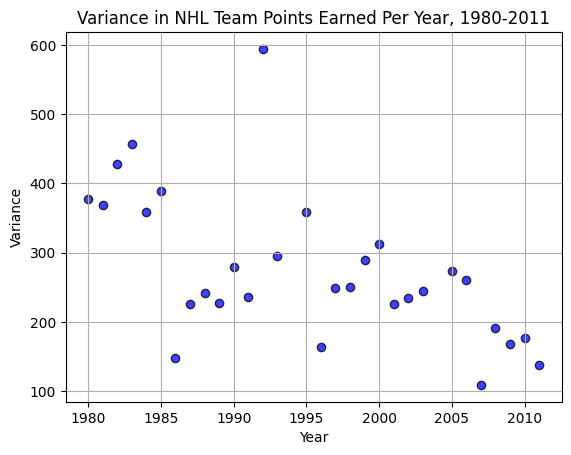

In [18]:
# Building scatter plot for years vs. variance in points scored in modern data
plt.scatter(points_earned_summary["year"],points_earned_summary["Points Earned Variance"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("Variance in NHL Team Points Earned Per Year, 1980-2011")
plt.xlabel("Year")
plt.ylabel("Variance")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

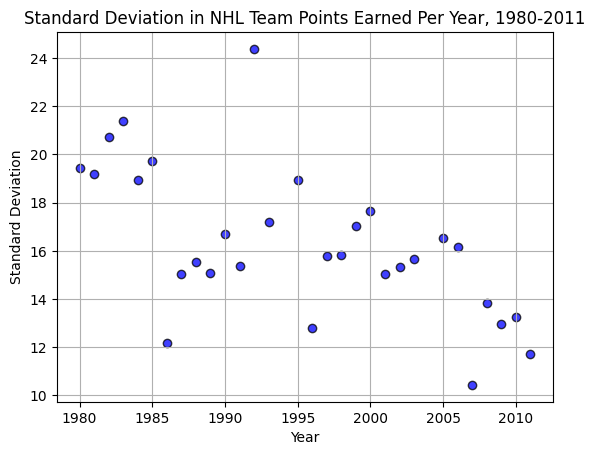

In [19]:
# Building scatter plot for years vs. variance in points scored in modern data
plt.scatter(points_earned_summary["year"],points_earned_summary["Points Earned Std. Dev"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("Standard Deviation in NHL Team Points Earned Per Year, 1980-2011")
plt.xlabel("Year")
plt.ylabel("Standard Deviation")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()